In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the datasets

In [2]:
dataset=pd.read_excel("E:\datasets\E-com_Data.xlsx")

In [3]:
data=dataset.copy()

In [4]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [5]:
# checking the missing value
data.isnull().sum()/len(data)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

<AxesSubplot:>

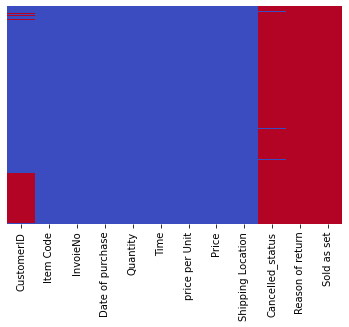

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [7]:
# checking the duplicates data
data.loc[data.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [8]:
# checking the unique value
data.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

# Data cleaning

In [9]:
# we need to drop the duplicated data
data=data.drop_duplicates(ignore_index=True)

In [10]:
data.shape

(537970, 12)

In [137]:
data.head(20)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,date,date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,2017-10-10,2017-10-10
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,2017-10-27,2017-10-27
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,2017-02-13,2017-02-13
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,2017-05-14,2017-05-14
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1,2017-05-12,2017-05-12
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1,2017-09-07,2017-09-07


In [139]:
data.iloc[166:176,:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,date,date_1
166,4043.0,14619,400134,2017-11-14,1,12:58:00,167.0,167.0,Location 1,2017-11-14,2017-11-14
167,4043.0,14619,399098,2017-11-04,1,12:45:00,167.0,167.0,Location 1,2017-11-04,2017-11-04
168,4043.0,14619,402238,2017-11-25,1,10:58:00,185.0,185.0,Location 1,2017-11-25,2017-11-25
169,4043.0,14618,404580,2017-12-01,1,17:52:00,196.0,196.0,Location 1,2017-12-01,2017-12-01
170,4043.0,14618,402238,2017-11-21,1,10:58:00,208.0,208.0,Location 1,2017-11-21,2017-11-21
171,4043.0,14618,403916,2017-12-04,1,11:12:00,217.0,217.0,Location 1,2017-12-04,2017-12-04
172,4043.0,14618,403353,2017-11-24,1,14:07:00,228.0,228.0,Location 1,2017-11-24,2017-11-24
173,4043.0,14618,406020,2017-12-14,2,14:23:00,210.0,420.0,Location 1,2017-12-14,2017-12-14
174,4043.0,14618,390830,2017-09-08,2,14:23:00,230.0,460.0,Location 1,2017-09-08,2017-09-08
175,4043.0,14619,406020,2017-12-16,3,14:23:00,181.0,543.0,Location 1,2017-12-16,2017-12-16


In [12]:
# dropping the missing values 
data=data.iloc[:,0:9]

In [13]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [14]:
data.isnull().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
dtype: int64

In [15]:
# dropping the missing data of CustomerId
data=data.dropna(subset=['CustomerID'])

In [16]:
data.isnull().sum()

CustomerID           0
Item Code            0
InvoieNo             0
Date of purchase     0
Quantity             0
Time                 0
price per Unit       0
Price                0
Shipping Location    0
dtype: int64

<AxesSubplot:>

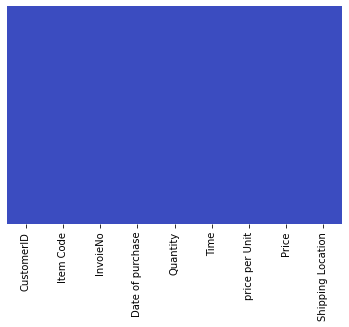

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Objective

Build an unsupervised Learning which can enable our company to analyse their customers performance 
via RFM method ( Recency, Frequency and Monetary method).

In [18]:
# recency=Latest date - Last date of invoice purchase
# frequency - No. of count of date of purchase
# Monetary - Total sum of amount purchased by customer


In [19]:
max(data['Date of purchase'])

Timestamp('2017-12-19 00:00:00')

In [20]:
recent_date=2017-12-20

In [21]:
import datetime as dt
Latest_date=dt.datetime(2017,12,20)

In [22]:
Latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [23]:
data['date']=data['Date of purchase']
data['date_1']=data['Date of purchase']

In [24]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,date,date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,2017-10-10,2017-10-10


# calculating recency

In [25]:
d_recency=data.groupby(['CustomerID'],as_index=False)['Date of purchase'].max()
d_recency.columns=['CustomerID','Last date']
d_recency['recency']=(Latest_date - d_recency['Last date']).dt.days
d_recency=d_recency.drop(['Last date'],axis=1)
d_recency.head()

,CustomerID,recency
0,2.0,4
1,3.0,77
2,4.0,19
3,5.0,311
4,6.0,37


# frequency and Monetary

In [26]:
d_FM_table=data.groupby('CustomerID').agg({'date': lambda x:x.count(),'Price':lambda x:x.sum()})
#d_FM_table.columns=['CustomerID','Frequency','Monetary']
d_FM_table.rename(columns={'date':'Frequency','Price':'Monetary'},inplace=True)

In [27]:
d_FM_table.head()

,Frequency,Monetary
CustomerID,,
2.0,182,553704.0
3.0,27,257404.0
4.0,72,176613.0
5.0,16,41976.0
6.0,84,151822.0


In [28]:
# Merging both recency and FM table
RFM_table=d_recency.merge(d_FM_table,left_on='CustomerID',right_on='CustomerID')
RFM_table.head()

,CustomerID,recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0


In [29]:
RFM_table.columns

Index(['CustomerID', 'recency', 'Frequency', 'Monetary'], dtype='object')

# Create RFM model by each customer

In [30]:
RFMscore=data.groupby("CustomerID").agg({'date_1':lambda x:(Latest_date-x.max()).days,'date':lambda x:x.count(),
                                       'Price':lambda x:x.sum()})


In [31]:
RFMscore.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4349 entries, 2.0 to 4372.0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date_1  4349 non-null   int64  
 1   date    4349 non-null   int64  
 2   Price   4349 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.9 KB


In [32]:
RFMscore.rename(columns={'date_1':'Recency','date':'Frequency','Price':'Monetary'},inplace=True)
RFMscore.head(10).reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
5,7.0,208,4,9410.0
6,8.0,233,58,135550.0
7,9.0,215,13,65832.0
8,10.0,25,58,331601.0
9,11.0,34,131,771439.0


# EDA part

In [33]:
RFMscore.describe()

,Recency,Frequency,Monetary
count,4349.000000,4349.000000,4.349000e+03
mean,93.299379,92.936537,2.299380e+05
std,100.701315,232.086935,8.572589e+05
min,1.000000,1.000000,-5.037200e+04
25%,18.000000,17.000000,3.814800e+04
50%,51.000000,42.000000,8.365500e+04
75%,144.000000,101.000000,2.056120e+05
max,381.000000,7970.000000,3.553619e+07


In [34]:
# split the data into four segment
quantiles=RFMscore.quantile([0.25,0.50,0.75])
quantiles=quantiles.to_dict()

In [35]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [36]:
# create a function to define R,F,M segment

def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMscoring(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [37]:
RFMscore.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [38]:
RFMscore['R']=RFMscore['Recency'].apply(Rscoring,args=('Recency',quantiles,))

In [39]:
RFMscore['F']=RFMscore['Frequency'].apply(FMscoring,args=('Frequency',quantiles))
RFMscore['M']=RFMscore['Monetary'].apply(FMscoring,args=('Monetary',quantiles))

In [40]:
RFMscore.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,3,3,1
4.0,19,72,176613.0,2,2,2
5.0,311,16,41976.0,4,4,3
6.0,37,84,151822.0,2,2,2


In [41]:
RFMscore.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4349 entries, 2.0 to 4372.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4349 non-null   int64  
 1   Frequency  4349 non-null   int64  
 2   Monetary   4349 non-null   float64
 3   R          4349 non-null   int64  
 4   F          4349 non-null   int64  
 5   M          4349 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 237.8 KB


In [42]:
RFMscore['RFMgroup']=RFMscore.R.map(str)+RFMscore.M.map(str)+RFMscore.F.map(str)

In [43]:
RFMscore.head(15)

,Recency,Frequency,Monetary,R,F,M,RFMgroup
CustomerID,,,,,,,
2.0,4,182,553704.0,1,1,1,111
3.0,77,27,257404.0,3,3,1,313
4.0,19,72,176613.0,2,2,2,222
5.0,311,16,41976.0,4,4,3,434
6.0,37,84,151822.0,2,2,2,222
7.0,208,4,9410.0,4,4,4,444
8.0,233,58,135550.0,4,2,2,422
9.0,215,13,65832.0,4,4,3,434
10.0,25,58,331601.0,2,2,1,212


In [44]:
RFMscore['RFM_score']=RFMscore[['R','F','M']].sum(axis=1)

In [45]:
RFMscore.head(20)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFM_score
CustomerID,,,,,,,,
2.0,4,182,553704.0,1,1,1,111,3
3.0,77,27,257404.0,3,3,1,313,7
4.0,19,72,176613.0,2,2,2,222,6
5.0,311,16,41976.0,4,4,3,434,11
6.0,37,84,151822.0,2,2,2,222,6
7.0,208,4,9410.0,4,4,4,444,12
8.0,233,58,135550.0,4,2,2,422,8
9.0,215,13,65832.0,4,4,3,434,11
10.0,25,58,331601.0,2,2,1,212,5


In [46]:
RFMscore.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4349 entries, 2.0 to 4372.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4349 non-null   int64  
 1   Frequency  4349 non-null   int64  
 2   Monetary   4349 non-null   float64
 3   R          4349 non-null   int64  
 4   F          4349 non-null   int64  
 5   M          4349 non-null   int64  
 6   RFMgroup   4349 non-null   object 
 7   RFM_score  4349 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.8+ KB


In [47]:
# Assign Loyalty level to each customer
loyalty_level=['Diamond','Platinum','Gold','Silver']
scores=pd.qcut(RFMscore.RFM_score,q=4,labels=loyalty_level)
RFMscore['Loyalty level']=scores.values


In [48]:
RFMscore.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFM_score,Loyalty level
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond
1,3.0,77,27,257404.0,3,3,1,313,7,Platinum
2,4.0,19,72,176613.0,2,2,2,222,6,Platinum
3,5.0,311,16,41976.0,4,4,3,434,11,Silver
4,6.0,37,84,151822.0,2,2,2,222,6,Platinum
5,7.0,208,4,9410.0,4,4,4,444,12,Silver
6,8.0,233,58,135550.0,4,2,2,422,8,Platinum
7,9.0,215,13,65832.0,4,4,3,434,11,Silver
8,10.0,25,58,331601.0,2,2,1,212,5,Diamond
9,11.0,34,131,771439.0,2,1,1,211,4,Diamond


In [49]:
# validate the data for RFM group-111
RFMscore[RFMscore['RFMgroup']=='111'].sort_values('Monetary',ascending=False).reset_index().head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFM_score,Loyalty level
0,1704.0,3,2053,35536194.0,1,1,1,111,3,Diamond
1,1896.0,2,5874,17743855.0,1,1,1,111,3,Diamond
2,1346.0,10,1395,12647317.0,1,1,1,111,3,Diamond
3,3802.0,3,1060,12319439.0,1,1,1,111,3,Diamond
4,4234.0,3,322,10654918.0,1,1,1,111,3,Diamond
5,1006.0,5,571,9351019.0,1,1,1,111,3,Diamond
6,3203.0,5,269,8102167.0,1,1,1,111,3,Diamond
7,2193.0,1,2489,7966054.0,1,1,1,111,3,Diamond
8,1448.0,5,1638,7892625.0,1,1,1,111,3,Diamond
9,3759.0,10,263,7545149.0,1,1,1,111,3,Diamond


In [50]:
RFMscore=RFMscore.reset_index()

In [51]:
RFMscore.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFMgroup', 'RFM_score', 'Loyalty level'],
      dtype='object')

In [52]:
# Handling negative data

def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [53]:
# Recency and Monetary - don't required handle_neg_n_zero function as they don't have negative values
RFMscore['Monetary']=[handle_neg_n_zero(x) for x in RFMscore.Monetary]

In [54]:
# perform Log transform to bring data into normal or near normal distribution
Log_TFd_data=RFMscore[['Recency','Frequency','Monetary']].apply(np.log,axis=1).round(3)

In [55]:
Log_TFd_data.head()

,Recency,Frequency,Monetary
0,1.386,5.204,13.224
1,4.344,3.296,12.458
2,2.944,4.277,12.082
3,5.740,2.773,10.645
4,3.611,4.431,11.930


In [56]:
new_data=RFMscore[['Recency','Frequency','Monetary']]

In [57]:
new_data.head()

,Recency,Frequency,Monetary
0,4,182,553704.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


# Feature Scaling

<AxesSubplot:ylabel='Monetary'>

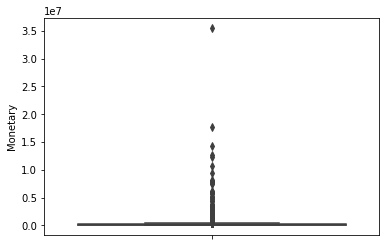

In [58]:
sns.boxplot(y='Monetary',data=new_data)

In [59]:
from sklearn.preprocessing import StandardScaler
scale_object=StandardScaler()
scaled_data=scale_object.fit_transform(new_data)
scaled_data

array([[-0.88687668,  0.38379456,  0.37766904],
       [-0.16187726, -0.28413542,  0.03198725],
       [-0.73790419, -0.09022026, -0.0622685 ],
       ...,
       [-0.83721918, -0.34446458, -0.23919388],
       [-0.88687668,  2.84867167,  0.05905846],
       [-0.48961672, -0.09883872,  0.03830589]])

In [62]:
scaled_data=pd.DataFrame(scaled_data,index=RFMscore.index,columns=new_data.columns)

In [63]:
scaled_data.head()

,Recency,Frequency,Monetary
0,-0.886877,0.383795,0.377669
1,-0.161877,-0.284135,0.031987
2,-0.737904,-0.090220,-0.062268
3,2.162093,-0.331537,-0.219344
4,-0.559137,-0.038510,-0.091191


# Build Clustering Model

In [78]:
from sklearn.cluster import KMeans

sum_of_sq_dist={}

for k in range(1,15):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=300)
    km=km.fit(scaled_data)
    sum_of_sq_dist[k]=km.inertia_

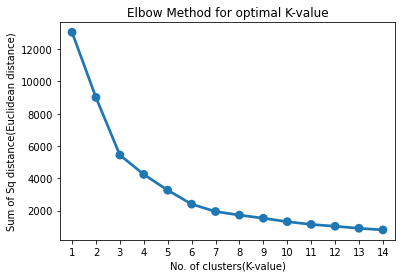

In [80]:
# visualisation for elbow method

sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel("No. of clusters(K-value)")
plt.ylabel("Sum of Sq distance(Euclidean distance)")
plt.title("Elbow Method for optimal K-value")
plt.show()

In [83]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300)
km=km.fit(scaled_data)

In [86]:
y_kmeans=km.predict(scaled_data)

In [87]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
RFMscore['Cluster']=km.labels_

In [89]:
RFMscore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFM_score,Loyalty level,Cluster
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond,0
1,3.0,77,27,257404.0,3,3,1,313,7,Platinum,0
2,4.0,19,72,176613.0,2,2,2,222,6,Platinum,0
3,5.0,311,16,41976.0,4,4,3,434,11,Silver,1
4,6.0,37,84,151822.0,2,2,2,222,6,Platinum,0


In [90]:
RFMscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     4349 non-null   float64 
 1   Recency        4349 non-null   int64   
 2   Frequency      4349 non-null   int64   
 3   Monetary       4349 non-null   float64 
 4   R              4349 non-null   int64   
 5   F              4349 non-null   int64   
 6   M              4349 non-null   int64   
 7   RFMgroup       4349 non-null   object  
 8   RFM_score      4349 non-null   int64   
 9   Loyalty level  4349 non-null   category
 10  Cluster        4349 non-null   int32   
dtypes: category(1), float64(2), int32(1), int64(6), object(1)
memory usage: 327.3+ KB


In [92]:
# look at the centroid per cluster

centroid_df=RFMscore.groupby('Loyalty level')[['CustomerID','Recency','Frequency','Monetary']].agg({'CustomerID':'nunique'
                                                ,'Recency':'mean','Frequency':'mean','Monetary':'mean'})                                                   

In [93]:
centroid_df

,CustomerID,Recency,Frequency,Monetary
Loyalty level,,,,
Diamond,1281,20.287276,230.898517,597121.263076
Platinum,1313,64.038081,57.903275,126605.333587
Gold,965,126.173057,24.640415,52128.385596
Silver,790,220.167089,10.879747,23748.235443


In [103]:
# look at the centroid per cluster
centroid_df=RFMscore.groupby('Cluster')[['CustomerID','Recency','Frequency','Monetary']].agg({'CustomerID':'nunique'
                                                ,'Recency':'mean','Frequency':'mean','Monetary':'mean'}).reset_index()

In [104]:
centroid_df=centroid_df.rename(columns={'CustomerID':'Num_of_Buyers'})

In [105]:
centroid_df

,Cluster,Num_of_Buyers,Recency,Frequency,Monetary
0,0,3242,41.513880,104.111351,2.375417e+05
1,1,1092,248.247253,27.860806,5.756997e+04
2,2,4,2.500000,5889.500000,8.363220e+06
3,3,11,6.818182,1151.818182,1.216187e+07


In [108]:
centroid_df['Percent']=round(centroid_df['Num_of_Buyers']/centroid_df.Num_of_Buyers.sum()*100,2)

In [109]:
centroid_df

,Cluster,Num_of_Buyers,Recency,Frequency,Monetary,Percent
0,0,3242,41.513880,104.111351,2.375417e+05,74.55
1,1,1092,248.247253,27.860806,5.756997e+04,25.11
2,2,4,2.500000,5889.500000,8.363220e+06,0.09
3,3,11,6.818182,1151.818182,1.216187e+07,0.25


In [126]:
centroid_df_1 = RFMscore.groupby('Loyalty level')[['Recency', 'Frequency', 'Monetary','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary':'sum','CustomerID':'nunique'}).reset_index()
centroid_df_1 = centroid_df_1.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df_1

,Loyalty level,Recency,Frequency,Monetary,NumBuyers
0,Diamond,20.287276,230.898517,764912338.0,1281
1,Platinum,64.038081,57.903275,166232803.0,1313
2,Gold,126.173057,24.640415,50303892.1,965
3,Silver,220.167089,10.879747,18761106.0,790


In [127]:
centroid_df_1['Percent'] = round(centroid_df_1['NumBuyers']/centroid_df_1.NumBuyers.sum()*100,2)
centroid_df_1

,Loyalty level,Recency,Frequency,Monetary,NumBuyers,Percent
0,Diamond,20.287276,230.898517,764912338.0,1281,29.46
1,Platinum,64.038081,57.903275,166232803.0,1313,30.19
2,Gold,126.173057,24.640415,50303892.1,965,22.19
3,Silver,220.167089,10.879747,18761106.0,790,18.17


In [128]:
!pip install squarify
import squarify

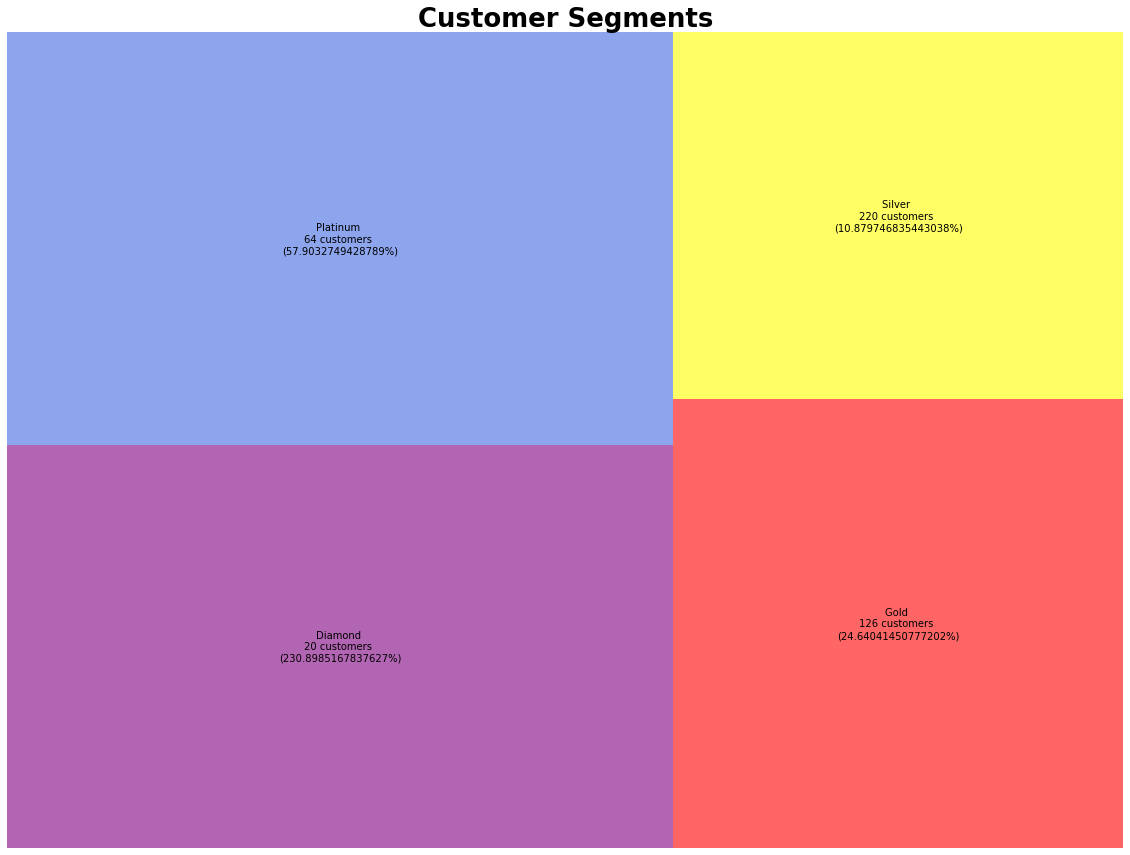

In [131]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dict ={'0': 'Purple','1':'royalblue','2':'red','3':'yellow'}

squarify.plot(sizes=centroid_df_1['NumBuyers'],
             color=colors_dict.values(),
             label=['{} \n{:.0f} customers \n({}%)'.format(*centroid_df_1.iloc[i])
             for i in range (0,len(centroid_df_1))], alpha=0.6)

plt.title("Customer Segments", fontsize=26, fontweight="bold")
plt.axis("off")

plt.show()

In [132]:
RFMscore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFM_score,Loyalty level,Cluster
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond,0
1,3.0,77,27,257404.0,3,3,1,313,7,Platinum,0
2,4.0,19,72,176613.0,2,2,2,222,6,Platinum,0
3,5.0,311,16,41976.0,4,4,3,434,11,Silver,1
4,6.0,37,84,151822.0,2,2,2,222,6,Platinum,0


In [133]:
RFMscore.to_excel("Final_E_commerce_outut.xlsx")

In [135]:
os.getcwd()

'C:\\Users\\ADMIN\\Resume project'